# Рынок заведений общественного питания Москвы

### Описание проекта

Необходимо выяснить целесообразность применения роботов в обслуживании клиентов небольшого кафе в Москве в долгосрочной перспективе.

В качестве датасета используются открытые данные о заведениях общественного питания в Москве.

## Загрузка данных и подготовка их к анализу

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import median, mean

pd.options.display.float_format = '{:.2f}'.format
sns.set(rc={'figure.figsize':(10,6)})

In [2]:
data = pd.read_csv('/datasets/rest_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Всего в датасете 6 столбцов:
* id — идентификатор объекта;
* object_name — название объекта общественного питания;
* chain — сетевой ресторан;
* object_type — тип объекта общественного питания;
* address — адрес;
* number — количество посадочных мест.

Пропусков не обнаружено. Тип данных в каждой колонке правильный. 

In [4]:
data.describe()

,id,number
count,15366.00,15366.00
mean,119720.07,59.55
std,73036.13,74.74
min,838.00,0.00
25%,28524.00,12.00
50%,144974.50,40.00
75%,184262.25,80.00
max,223439.00,1700.00


В столбце `number` есть нулевые значения, что теоретически возможно. Однако максимум в данном стобце выглядит аномальным. 

In [5]:
data.duplicated().sum()

0

Явных дубликатов не выявлено. Проверим, есть ли явные дубликаты с разными id. 

In [6]:
data[['object_name', 'chain', 'object_type', 'address', 'number']].duplicated().sum()

82

In [7]:
data[data['object_name'].duplicated()]

,id,object_name,chain,object_type,address,number
33,69243,Суши Wok,да,кафе,"город Москва, проспект Андропова, дом 30",4
48,21720,Хлеб насущный,да,кафе,"город Москва, улица Арбат, дом 32",40
53,21998,Му-Му,да,кафе,"город Москва, улица Арбат, дом 45/24",220
75,22804,Домино'с Пицца,да,кафе,"город Москва, Башиловская улица, дом 3, корпус 1",10
112,72564,Вареничная №1,да,кафе,"город Москва, 2-я Брестская улица, дом 43",75
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


Одинаковые названия могут отсылать к одной сети кафе или ресторанов, однако каждое кафе должно находится по разному адресу и иметь разный тип заведения. 

In [8]:
data[data[['object_name', 'address', 'object_type']].duplicated()]

,id,object_name,chain,object_type,address,number
115,28614,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,буфет,"город Москва, Бригадирский переулок, дом 3-5",12
580,149205,Общественное питание,нет,кафе,"город Москва, Павелецкая площадь, дом 1",35
581,149131,Общественное питание,нет,кафе,"город Москва, Павелецкая площадь, дом 1",39
1409,151267,Альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",45
2375,28604,КОМБИНАТ ПИТАНИЯ МГТУ ИМ.Н.Э.БАУМАНА,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",150
...,...,...,...,...,...,...
15173,218542,Кофе с собой,да,предприятие быстрого обслуживания,"город Москва, Алтуфьевское шоссе, дом 70, корп...",0
15216,214468,Макдоналдс,да,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 87Б",0
15217,214146,Макдоналдс,да,предприятие быстрого обслуживания,"город Москва, Кировоградская улица, дом 13А",0
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20


Выявлен 171 дубликат. Удалим дублирующиеся значения из датасета.

In [9]:
data.drop_duplicates(subset=['object_name', 'address', 'object_type'], inplace=True)

Перейдем к поиску возможных неявных дубликатов в столбцах с категориальными данными `object_type` и `chain`.

In [10]:
data['object_type'].value_counts()

кафе                                 6017
столовая                             2575
ресторан                             2275
предприятие быстрого обслуживания    1891
бар                                   853
буфет                                 571
кафетерий                             393
закусочная                            348
магазин (отдел кулинарии)             272
Name: object_type, dtype: int64

In [11]:
data['chain'].value_counts()

нет    12245
да      2950
Name: chain, dtype: int64

Неявных дубликатов в столбцах с категориальными данными не выявлено.

Перейдем к изучению аномальных значений. 

In [12]:
data.sort_values('number', ascending=False).head(10)

,id,object_name,chain,object_type,address,number
12723,199696,Arena by Soho Family,нет,бар,"город Москва, Кутузовский проспект, дом 36, ст...",1700
8148,80291,Банкетный зал Шелк,нет,ресторан,"город Москва, Большой Саввинский переулок, дом...",1500
8345,27750,СТОЛОВАЯ-БУФЕТ,нет,столовая,"город Москва, улица Волхонка, дом 15",1400
9064,19719,КОМБИНАТ ПИТАНИЯ «УПРАВЛЕНИЕ АКАДЕМСЕРВИС»,нет,столовая,"город Москва, проспект Вернадского, дом 84, ст...",1288
3686,27026,РУМ СЕРВИС,нет,ресторан,"город Москва, площадь Европы, дом 2",1200
4480,27024,РУМ СЕРВИС,нет,ресторан,"город Москва, Кутузовский проспект, дом 2/1, с...",1200
2313,26560,Ресторан «АЛЬФА»,нет,ресторан,"город Москва, Измайловское шоссе, дом 71, корп...",1040
9955,171116,EATALY,нет,ресторан,"город Москва, Киевская улица, дом 2",920
5649,29232,СТОЛОВАЯ МОСКОВСКИЙ ГУМАНИТАРНЫЙ УНИВЕРСИТЕТ,нет,столовая,"город Москва, улица Юности, дом 5, строение 1",760
13299,200905,White Hall,нет,ресторан,"город Москва, Ферганская улица, дом 8",700


Поиск в Интернете по десятке крупнейших заведений по числу мест подтвердил данные. Однако никакой информации о заведении "СТОЛОВАЯ-БУФЕТ" по адресу город Москва, улица Волхонка, дом 15 не было найдено. Удалим данное значение. 

In [13]:
data = data[data['id']!= 27750]

### Вывод

Таким образом, на данномэтапе были проверены типы данных в датафрейме, проверены пропуски и удалены дубликаты. Также были изучены столбцы с категориальными и количественными значениями.

## Анализ данных

### Cоотношение видов объектов общественного питания по количеству

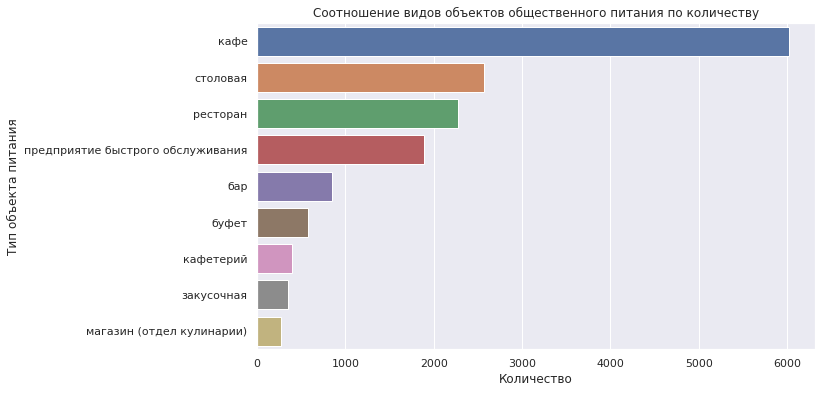

In [14]:
sns.countplot(y='object_type', data=data, order=data['object_type'].value_counts().index)
plt.xlabel('Количество')
plt.ylabel('Тип объекта питания')
plt.title('Cоотношение видов объектов общественного питания по количеству')
plt.show()

Наибольшее количество заведений общественного питания в Москве занимают кафе - около 6 тыс. шт. Существенно ниже количество столовых, ресторанов и предприятий быстрого обслуживания - 2.5, 2.2 и 1.9 тыс. соответственно. 

### Cоотношение сетевых и несетевых заведений по количеству

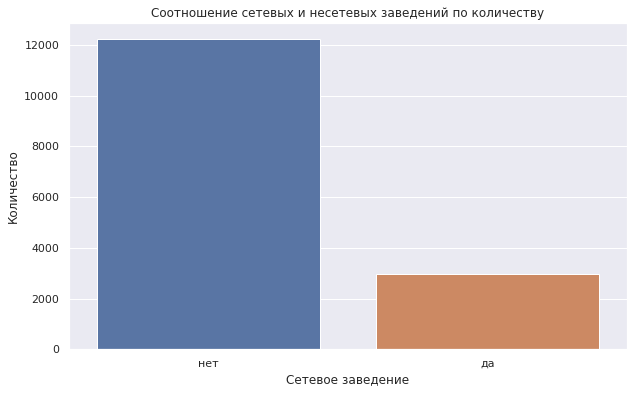

In [15]:
sns.countplot(x='chain', data=data)
plt.ylabel('Количество')
plt.xlabel('Сетевое заведение')
plt.title('Cоотношение сетевых и несетевых заведений по количеству')
plt.show()

В Москве насчитавается больше всего объектов питания, которые не относятся к сетевым заведениям (12 тыс. шт.). При этом к сетевым заведениям относится около 3 тыс. заведений.

### Cоотношение вида объекта общественного питания и сетевого распространения

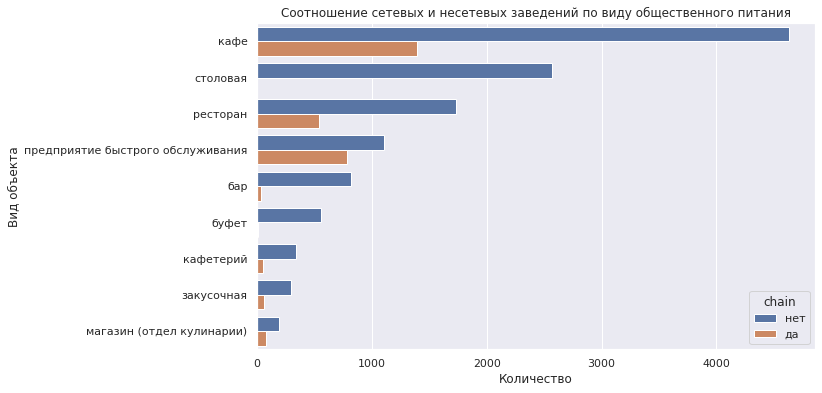

In [16]:
sns.countplot(y='object_type', hue='chain', data=data, order=data[data['chain']=='нет']['object_type'].value_counts().index)
plt.xlabel('Количество')
plt.ylabel('Вид объекта')
plt.title('Cоотношение сетевых и несетевых заведений по виду общественного питания')
plt.show()

В абсолютном выражении в Москве больше всего несетевых кафе, столовых и ресторанов. При этом в топ-3 по количеству сетевых заведений входят кафе, предприятия быстрого обслуживания и рестораны.

In [17]:
pivot_table = data.pivot_table(index='object_type', columns='chain', values='id', aggfunc='count').reset_index()
pivot_table['share'] = (pivot_table['да'] / (pivot_table['да'] + pivot_table['нет']))
pivot_table.columns = ['Вид объекта', 'С сетевым распространением', 'Без сетевого распространения', 'Доля с сетевым распространением']
pivot_table

,Вид объекта,С сетевым распространением,Без сетевого распространения,Доля с сетевым распространением
0,бар,37,816,0.04
1,буфет,11,560,0.02
2,закусочная,56,292,0.16
3,кафе,1389,4628,0.23
4,кафетерий,51,342,0.13
5,магазин (отдел кулинарии),78,194,0.29
6,предприятие быстрого обслуживания,784,1107,0.41
7,ресторан,541,1734,0.24
8,столовая,3,2571,0.00


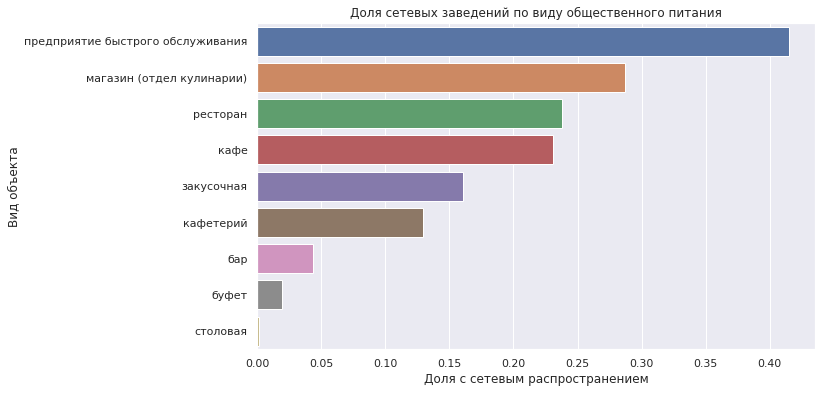

In [18]:
sns.barplot(x='Доля с сетевым распространением', y='Вид объекта', data=pivot_table.sort_values(by='Доля с сетевым распространением', ascending=False))
plt.title('Доля сетевых заведений по виду общественного питания')
plt.show()

В относительном выражении в Москве больше всего сетевых предприятий быстрого обслуживания, отделов кулинарии в магазинах, ресторанов и кафе. Таким образом, сетевое распределение наиболее характерно для этих типов заведений.

### Посадочные места в сетевых заведениях

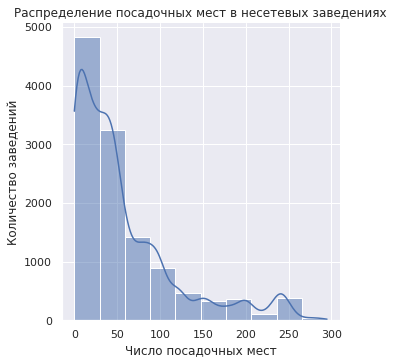

In [19]:
sns.displot(data[(data['chain']=='нет') & (data['number']<300)]['number'], bins=10, kde=True)
plt.ylabel('Количество заведений')
plt.xlabel('Число посадочных мест')
plt.title('Распределение посадочных мест в несетевых заведениях')
plt.show()

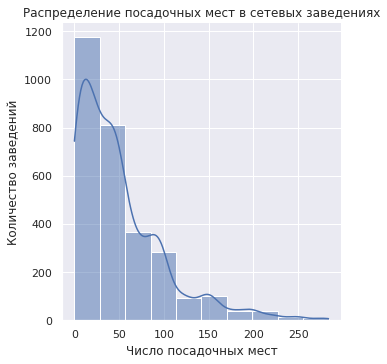

In [20]:
sns.displot(data[(data['chain']=='да') & (data['number']<300)]['number'], bins=10, kde=True)
plt.ylabel('Количество заведений')
plt.xlabel('Число посадочных мест')
plt.title('Распределение посадочных мест в сетевых заведениях')
plt.show()

In [21]:
pivot_table = data[(data['chain']=='да') & (data['number']<300)].groupby('number').count()['id']
pivot_table

number
0      263
1       15
2       29
3       16
4       44
      ... 
275      1
276      1
280      2
282      1
284      1
Name: id, Length: 178, dtype: int64

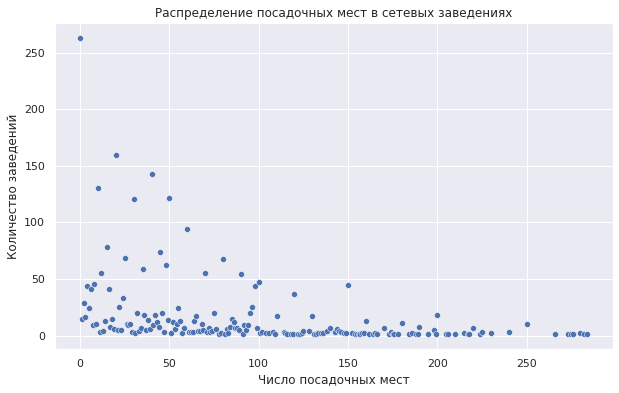

In [22]:
sns.scatterplot(data=pivot_table)
plt.ylabel('Количество заведений')
plt.xlabel('Число посадочных мест')
plt.title('Распределение посадочных мест в сетевых заведениях')
plt.show()

In [28]:
data_copy = data.copy()[data['chain']=='да']
pivot_table = data_copy.pivot_table(index='object_name', values=['id', 'number'], aggfunc={'id':'count', 'number': 'mean'}).sort_values(by='id', ascending=False).reset_index()

In [29]:
pivot_table

,object_name,id,number
0,KFC,155,55.34
1,Шоколадница,139,56.76
2,Бургер Кинг,121,45.27
3,Макдоналдс,119,82.92
4,Домино'с Пицца,86,18.21
...,...,...,...
718,Кафе «МЕЛЕНКА»,1,60.00
719,Кафе «МАКДОНАЛДС»,1,40.00
720,Кафе «Кулинарное бюро»,1,18.00
721,Кафе «Кулинарная лавка братьев Караваевых»,1,10.00


In [30]:
pivot_table.describe()

,id,number
count,723.00,723.00
mean,4.08,60.31
std,12.53,56.16
min,1.00,0.00
25%,1.00,20.00
50%,1.00,45.00
75%,2.00,83.75
max,155.00,356.00


<AxesSubplot:title={'center':'Количество ресторанов в сети'}>

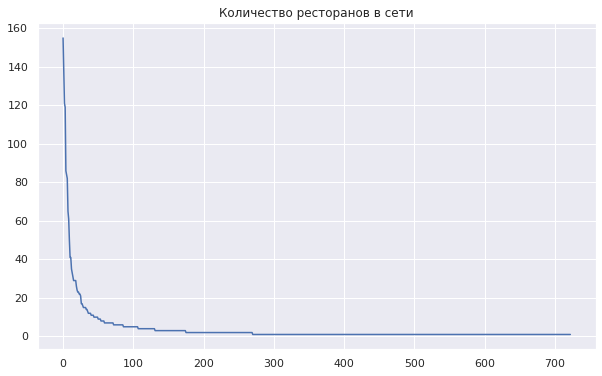

In [31]:
pivot_table['id'].plot(title='Количество ресторанов в сети')

Возьмем в качестве границы 10 ресторанов в сети: больше 10 - много заведений, меньше - мало заведений.

<AxesSubplot:title={'center':'Среднее количество посадочных мест в сети'}>

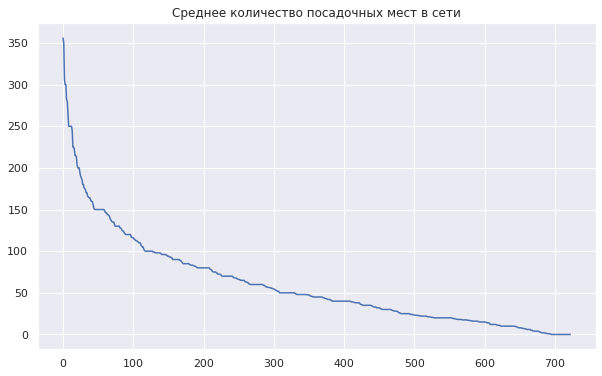

In [32]:
pivot_table.sort_values(by='number', ascending=False).reset_index()['number'].plot(title='Среднее количество посадочных мест в сети')

Возьмем в качестве границы 60 посадочных мест: больше 60 - много посадочных мест, меньше - мало посадочых мест.

In [33]:
def define_group(string):
    if string[1] < 10:
        count = 'мало заведений'
    else:
        count = 'много заведений'
    
    if string[2] < 60:
        number = 'мало мест'
    else:
        number = 'много мест'
    
    return count + ', ' + number
    
pivot_table['group'] = pivot_table.apply(define_group, axis=1)
pivot_table

,object_name,id,number,group
0,KFC,155,55.34,"много заведений, мало мест"
1,Шоколадница,139,56.76,"много заведений, мало мест"
2,Бургер Кинг,121,45.27,"много заведений, мало мест"
3,Макдоналдс,119,82.92,"много заведений, много мест"
4,Домино'с Пицца,86,18.21,"много заведений, мало мест"
...,...,...,...,...
718,Кафе «МЕЛЕНКА»,1,60.00,"мало заведений, много мест"
719,Кафе «МАКДОНАЛДС»,1,40.00,"мало заведений, мало мест"
720,Кафе «Кулинарное бюро»,1,18.00,"мало заведений, мало мест"
721,Кафе «Кулинарная лавка братьев Караваевых»,1,10.00,"мало заведений, мало мест"


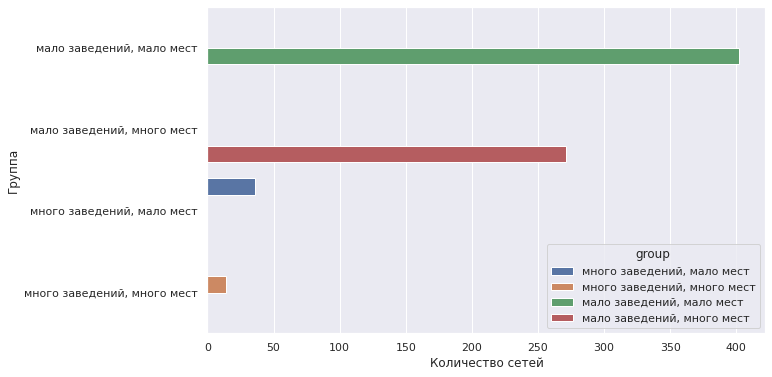

In [45]:
sns.countplot(y='group', data=pivot_table, hue='group', order=pivot_table['group'].value_counts().index)
plt.ylabel('Группа')
plt.xlabel('Количество сетей')
plt.show()

Таким образом, для сетевых франшиз в Москве характерно мало заведений с малым количестом мест.

### Cреднее количество посадочных мест для каждого вида объекта общественного питания

In [35]:
order = data.groupby('object_type').mean().sort_values(by='number', ascending=False).index

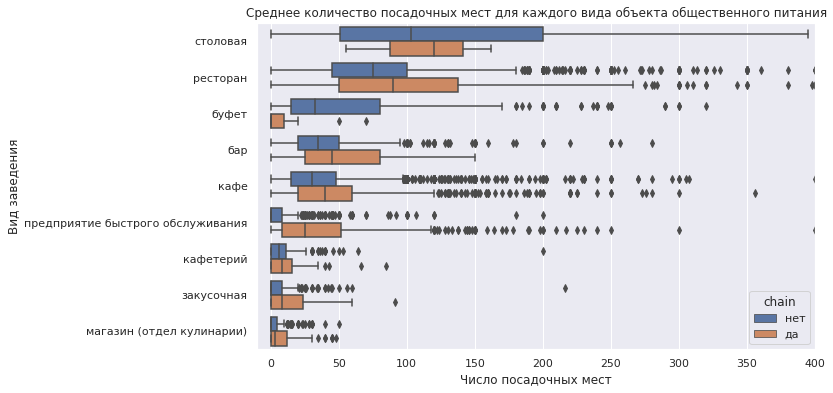

In [36]:
sns.boxplot(x='number', y = 'object_type', hue='chain', data = data, order=order).set(xlim=(-10, 400))
plt.ylabel('Вид заведения')
plt.xlabel('Число посадочных мест')
plt.title('Cреднее количество посадочных мест для каждого вида объекта общественного питания')
plt.show()

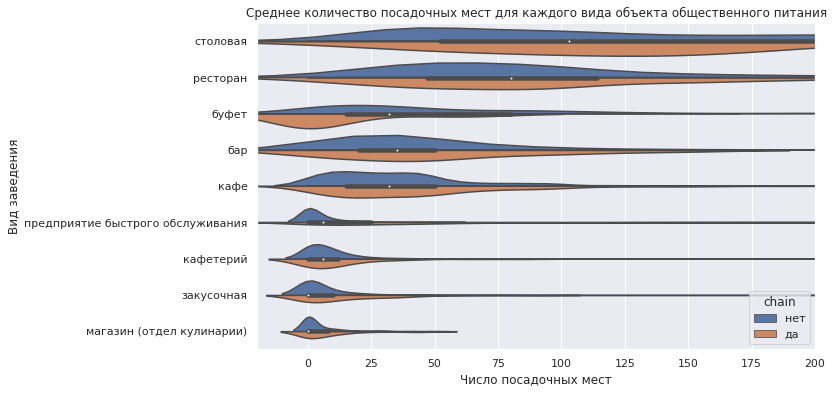

In [37]:
sns.violinplot(y='object_type', x='number', data=data, hue='chain', split=True, order=order).set(xlim=(-20, 200))
plt.ylabel('Вид заведения')
plt.xlabel('Число посадочных мест')
plt.title('Cреднее количество посадочных мест для каждого вида объекта общественного питания')
plt.show()

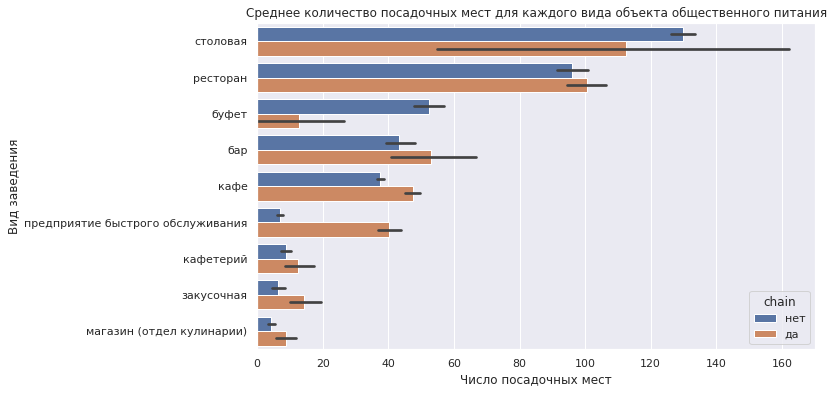

In [38]:
sns.barplot(y='object_type', x='number', data=data, hue='chain', order=order, estimator=mean)
plt.ylabel('Вид заведения')
plt.xlabel('Число посадочных мест')
plt.title('Cреднее количество посадочных мест для каждого вида объекта общественного питания')
plt.show()

Стоит отметить, что в данных присутствует достаточно сильная неоднородность.

В целом можно сказать, что в несетевых заведениях самое большое среднее число посадочных мест у столовых, ресторанов и буфетов, а в сетевых заведениях - у столовых, ресторанов и баров. 


In [39]:
order = data.groupby('object_type').median().sort_values(by='number', ascending=False).index

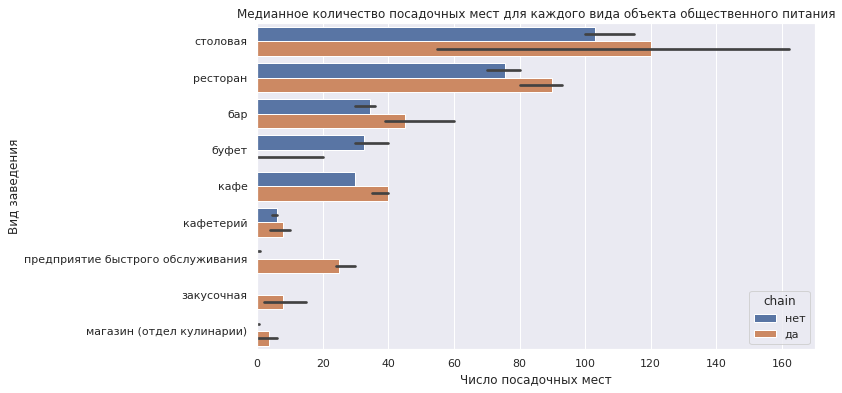

In [40]:
sns.barplot(y='object_type', x='number', data=data, hue='chain', order=order, estimator=median)
plt.ylabel('Вид заведения')
plt.xlabel('Число посадочных мест')
plt.title('Медианное количество посадочных мест для каждого вида объекта общественного питания')
plt.show()

Выводы, сделаные по средним значениям, в целом подтверждаются медианными значениями. 

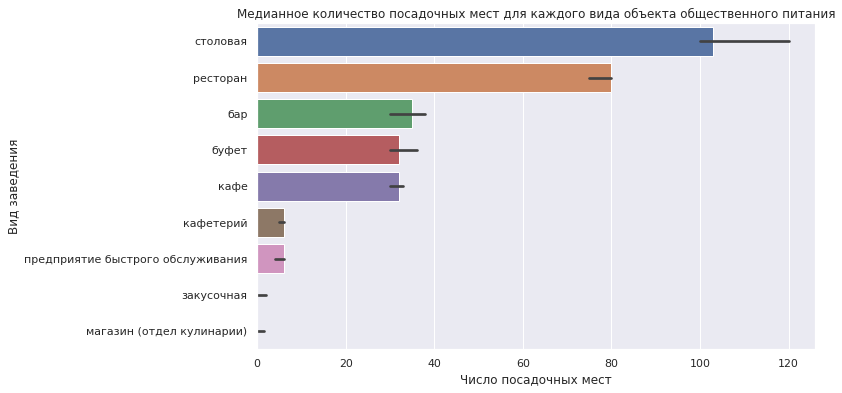

In [41]:
sns.barplot(y='object_type', x='number', data=data, estimator=median, order=order)
plt.ylabel('Вид заведения')
plt.xlabel('Число посадочных мест')
plt.title('Медианное количество посадочных мест для каждого вида объекта общественного питания')
plt.show()

Без разбивки предприятий на сетевые и несетевые, можно сказать, что больше всего посадочных мест в столовых, ресторанах и буфетах (130, 97 и 51 соответственно).

### Выделение в отдельный столбец информации об улице

После многих попыток веделения улицы и адреса я пришел к следующей функции:

In [42]:
street_variants = ['улица', 'проспект', 'набережная', 'проезд', 'бульвар', 'шоссе', 'переулок', 'площадь', 'аллея', 'квартал', 'линия', 'тупик']

def get_street(address):
    splited_address = address.split(', ')
    for address_part in splited_address:
        for street_variant in street_variants:
            if street_variant in address_part:
                return address_part.strip()
    return None

In [43]:
data['street'] = data['address'].apply(get_street)
data

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15359,222077,Кофейня «Шоколадница»,да,кафе,"город Москва, Кантемировская улица, дом 47",72,Кантемировская улица
15360,219759,Шоколадница,да,кафе,"город Москва, улица Вавилова, дом 3",36,улица Вавилова
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал


### Топ-10 улиц по количеству объектов общественного питания

In [44]:
pivot_table = data.pivot_table(index='street', values='id', aggfunc='count').sort_values(by='id', ascending=False).head(10).reset_index()
pivot_table

,street,id
0,проспект Мира,197
1,Профсоюзная улица,181
2,Ленинградский проспект,172
3,Пресненская набережная,165
4,Варшавское шоссе,164
5,Ленинский проспект,148
6,проспект Вернадского,127
7,Кутузовский проспект,114
8,Каширское шоссе,110
9,Кировоградская улица,107


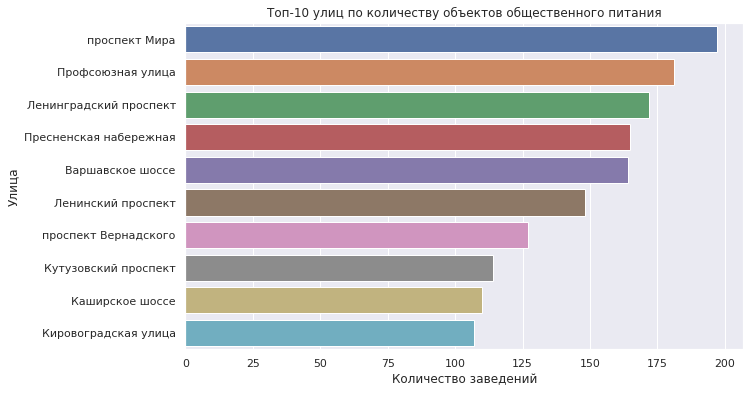

In [45]:
sns.barplot(x='id', y='street', data=pivot_table)
plt.xlabel('Количество заведений')
plt.ylabel('Улица')
plt.title('Топ-10 улиц по количеству объектов общественного питания')
plt.show()

Больше всего объектов общественного питания на проспекте Мира, Профсоюзной улице, Ленинградском проспекте, Пресненской набережной и Варшавском шоссе.

В качестве внешного источника данных я использовал сервис DaData с открытым API. Он позволяет получить исчерпывающую информацию об адресе. В день бесплатно 10 000 запросов.

In [46]:
import requests
import json
# Прикладываю token и secret для проверки работоспособности, при публикации на github удалю
token, secret = 'token', 'secret'

# Функция делает POST запрос на сервер DaData и возвращает район улицы
def get_data(street):
    try:
        response = requests.post(
            'https://cleaner.dadata.ru/api/v1/clean/address',
            data=f'["Москва, {street}"]'.encode('utf-8'),
            headers={'Content-Type': 'application/json', 'Accept': 'application/json', 'Authorization': f'Token {token}', 'X-Secret': secret}
        )
        return response.json()[0]['city_district']
    except ConnectionError:
        return None

In [47]:
try:
    pivot_table['district'] = pivot_table['street'].apply(get_data)
except Exception:
    pivot_table = pd.read_csv('https://drive.google.com/uc?id=1Fux3K7puVjYX41MEObugvgabNnMmDlqO')[['street','district', 'id']]
finally:
    display(pivot_table)

,street,district,id
0,проспект Мира,Марьина роща,197
1,Профсоюзная улица,Ясенево,181
2,Ленинградский проспект,Сокол,172
3,Пресненская набережная,Пресненский,165
4,Варшавское шоссе,Нагорный,164
5,Ленинский проспект,Теплый Стан,148
6,проспект Вернадского,Раменки,127
7,Кутузовский проспект,Дорогомилово,114
8,Каширское шоссе,Орехово-Борисово Северное,110
9,Кировоградская улица,Чертаново Южное,107


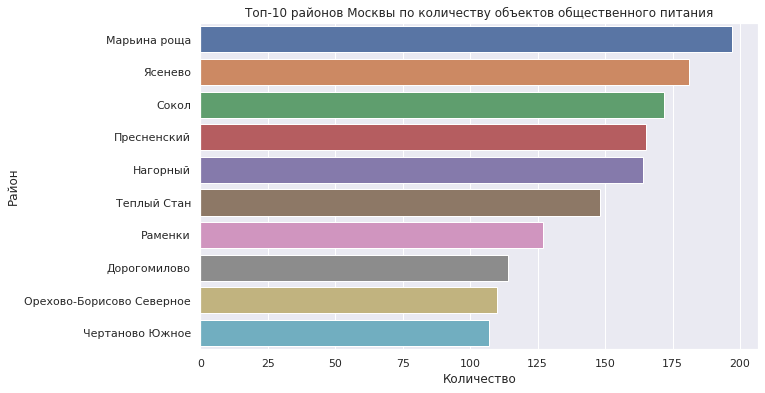

In [48]:
sns.barplot(x='id', y='district', data=pivot_table)
plt.ylabel('Район')
plt.xlabel('Количество')
plt.title('Топ-10 районов Москвы по количеству объектов общественного питания')
plt.show()

In [49]:
streets = pd.read_csv('https://drive.google.com/uc?id=1Oz9fThjPIL3tmCPUMrlJKthd_K-i-_-X')
streets

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


In [50]:
pivot_table = data.pivot_table(index='street', values='id', aggfunc='count').sort_values(by='id', ascending=False).head(10).reset_index()
pivot_table.columns = ['streetname', 'count']
pivot_table = pivot_table.merge(streets, on='streetname', how='left')
pivot_table

,streetname,count,areaid,okrug,area
0,проспект Мира,197,70,СВАО,Алексеевский район
1,проспект Мира,197,86,СВАО,Ярославский Район
2,проспект Мира,197,78,СВАО,Район Марьина роща
3,проспект Мира,197,79,СВАО,Останкинский район
4,проспект Мира,197,81,СВАО,Район Ростокино
5,проспект Мира,197,82,СВАО,Район Свиблово
6,проспект Мира,197,16,ЦАО,Мещанский район
7,Профсоюзная улица,181,123,ЮЗАО,Академический район
8,Профсоюзная улица,181,132,ЮЗАО,Район Черемушки
9,Профсоюзная улица,181,134,ЮЗАО,Район Ясенево


In [51]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(pivot_table.groupby('streetname')['area'].apply(lambda x: "%s" % ', '.join(x)))

,area
streetname,
Варшавское шоссе,"Район Чертаново Центральное, Район Чертаново Северное, Район Чертаново Южное, Донской район, Район Нагатино-Садовники, Нагорный район, Район Северное Бутово, Район Южное Бутово"
Каширское шоссе,"Район Москворечье-Сабурово, Район Нагатино-Садовники, Район Орехово-Борисово Южное, Район Орехово-Борисово Северное"
Кировоградская улица,"Район Чертаново Центральное, Район Чертаново Северное, Район Чертаново Южное"
Кутузовский проспект,"Район Дорогомилово, Район Фили-Давыдково"
Ленинградский проспект,"Район Аэропорт, Район Беговой, Хорошевский район, Район Сокол"
Ленинский проспект,"Район Проспект Вернадского, Район Тропарево-Никулино, Донской район, Район Гагаринский, Ломоносовский район, Обручевский район, Район Теплый Стан, Район Якиманка"
Пресненская набережная,Пресненский район
Профсоюзная улица,"Академический район, Район Черемушки, Район Ясенево, Район Коньково, Обручевский район, Район Теплый Стан"
проспект Вернадского,"Район Проспект Вернадского, Район Раменки, Район Тропарево-Никулино, Район Гагаринский, Ломоносовский район"


Больше всего заведений общественного питания в следующих районах: Марьина роща, Ясенево, Сокол, Пресненский район и Нагорный.

### Число улиц с одним объектом общественного питания

In [52]:
try:
    pivot_table = data.pivot_table(index='street', values='id', aggfunc='count').sort_values(by='id', ascending=False).reset_index()
    pivot_table = pivot_table[pivot_table['id']==1].reset_index(drop=True)
    pivot_table['district'] = pivot_table['street'].apply(get_data)
    pivot_table = pivot_table[['street', 'district']]
except Exception:
    pivot_table = pd.read_csv('https://drive.google.com/uc?id=1g2nh69TKrYxC8URUd6LMlDzgk1xvnMM2')[['street','district']]
finally:
    display(pivot_table)

,street,district
0,3-й Павловский переулок,Даниловский
1,улица Девятая Рота,Преображенское
2,улица Захарьинские Дворики,Южное Бутово
3,улица Корнея Чуковского,Новомосковский
4,Газгольдерная улица,Нижегородский
...,...,...
546,Кунцевская улица,Кунцево
547,Кулаков переулок,Алексеевский
548,Кузьминская улица,Выхино-Жулебино
549,2-я Сокольническая улица,Сокольники


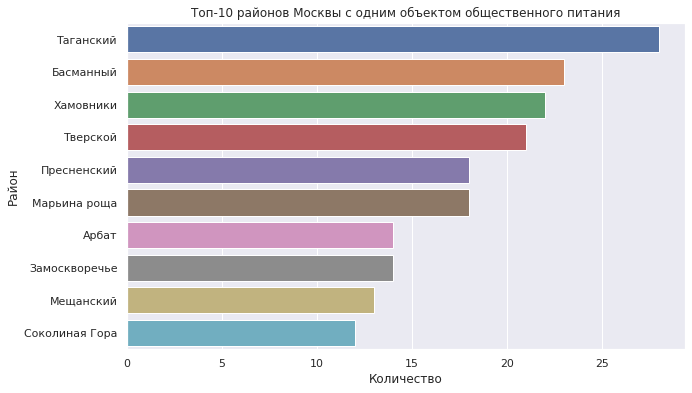

In [53]:
sns.countplot(y='district', data=pivot_table, order=pivot_table['district'].value_counts().head(10).index)
plt.ylabel('Район')
plt.xlabel('Количество')
plt.title('Топ-10 районов Москвы с одним объектом общественного питания')
plt.show()

Больше всего улиц с одним объектом общественного питания в Таганском, Басманном районах, Хамовниках и Тверской.

# Вывод

В данной работе был проведен анализ заведений общественного питания Москвы по различным критериям.

Основываясь на результатах работы, можно сделать следующие рекомендации по открытию общественного заведения в Москве:
* Открытие кафе целесообразно, поскольку они пользуются популярностью. Однако необходимо уделить пристальное внимание конкурентным преимуществам, которые позволят выделить новое заведение на фоне остальных.
* Москве свойствено распространение несетевых заведений. Это означает, что конкуренция со стороны крупных игроков рынка общественного питания не будет составлять существенной угрозы. Только 23% всех кафе в Москве являются сетевыми. При этом сетевое распределение наиболее характерно для предприятий быстрого обслуживания, отделов кулинарии в магазинах и ресторанов.
* Для сетевых и несетевых заведений характерно наличие небольшого количества мест (от 0 до 50). Больше всего посадочных мест в столовых, ресторанах и буфетах. Рекомендуемое количество посадочных мест в кафе составляет 40 мест.
* Больше всего объектов общественного питания на проспекте Мира, Профсоюзной улице, Ленинградском проспекте, Пресненской набережной и Варшавском шоссе (Марьина роща, Ясенево, Сокол, Пресненский район и Нагорный районы). Открытие кафе в этих районах рекомендуется только при наличии значительных конкурентных преимуществ.
* При этом меньше всего заведений общественного питания на улицах в Таганском, Басманном районах, Хамовниках и Тверской. Открытие кафе в этих районах рекомендуется при достаточном прогнозном значении спроса. 

Таким образом, обслуживание посетителей заведения с помощью роботов позволит добиться успеха кафе в краткосрочной и среднесрочной перспективе. Однако в долгосрочной песпективе преимущество, полученное за счет внедрения инноваций в обслуживании, может сойти на нет, поэтому кафе придется искать новые драйверы роста.